In [36]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

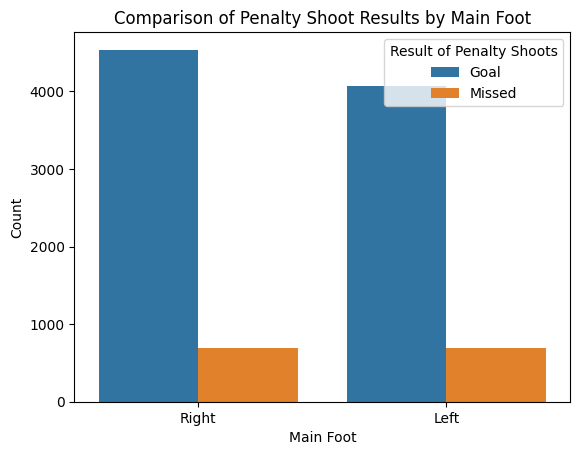

In [37]:
players = pd.read_csv('penalty_kicks_dataset.csv')
players = players.dropna()
players.keys()
foot = players['Main Foot']
penalties = players['Penalty Shoot Direction']
result = players['Result of Penalty Shoots']


sns.countplot(x='Main Foot', hue='Result of Penalty Shoots', data=players)

plt.title('Comparison of Penalty Shoot Results by Main Foot')
plt.xlabel('Main Foot')
plt.ylabel('Count')

plt.show()


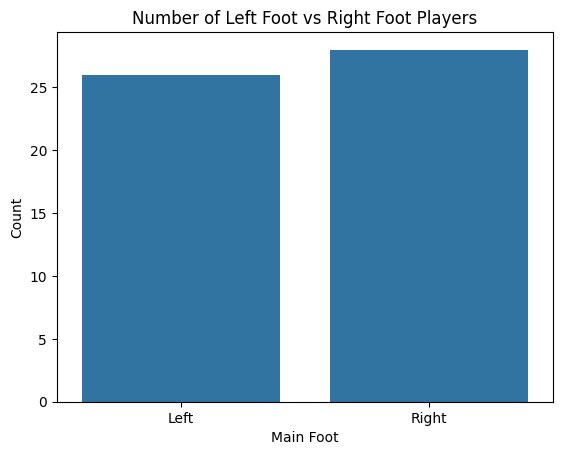

In [38]:
players_stats = pd.read_csv('players.csv')
sns.countplot(x='main_foot', data=players_stats)

plt.title('Number of Left Foot vs Right Foot Players')
plt.xlabel('Main Foot')
plt.ylabel('Count')

plt.show()

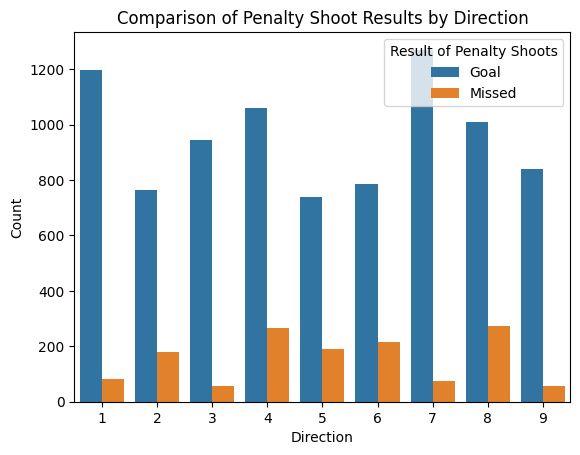

In [39]:
direction = players['Penalty Shoot Direction']
result = players['Result of Penalty Shoots']
sns.countplot(x='Penalty Shoot Direction', hue='Result of Penalty Shoots', data=players)

plt.title('Comparison of Penalty Shoot Results by Direction')
plt.xlabel('Direction')
plt.ylabel('Count')

plt.show()

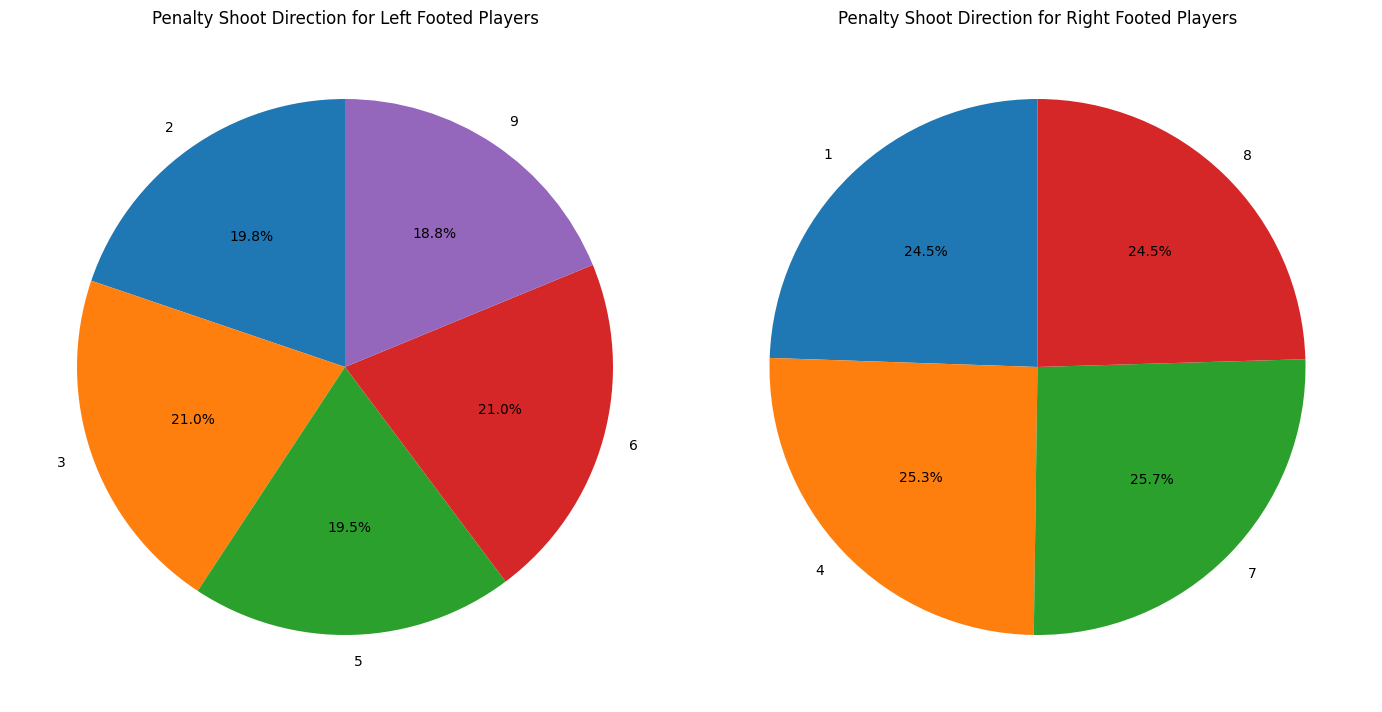

In [40]:
foot_direction_counts = players.groupby('Main Foot')['Penalty Shoot Direction'].value_counts(normalize=True) * 100
# Convert the Series with MultiIndex to a DataFrame
foot_direction_df = foot_direction_counts.reset_index(name='Percentage')

pivot_df = foot_direction_df.pivot(index='Penalty Shoot Direction', columns='Main Foot', values='Percentage')

# Plotting the pie charts for each foot
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for players with 'Left' foot
ax[0].pie(pivot_df['Left'].dropna(), labels=pivot_df['Left'].dropna().index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Penalty Shoot Direction for Left Footed Players')

# Pie chart for players with 'Right' foot
ax[1].pie(pivot_df['Right'].dropna(), labels=pivot_df['Right'].dropna().index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Penalty Shoot Direction for Right Footed Players')

# Display the plots
plt.tight_layout()
plt.show()


In [41]:
# preprocessing
penalties_kick = pd.read_csv('penalty_kicks_dataset.csv')
penalties_kick = penalties_kick.dropna()
penalties_kick['Result of Penalty Shoots'] = penalties_kick['Result of Penalty Shoots'].map({'Goal': 1, 'Missed': 0})
penalties_kick['Main Foot'] = penalties_kick['Main Foot'].map({'Right': 1, 'Left': 0})


names ={}
i = 0
for name in penalties_kick['Player Name'].unique():
    penalties_kick.loc[penalties_kick['Player Name'] == name, 'Player Name'] = i
    i += 1
    names[name] = i


penalties_kick


,Player Name,Main Foot,Penalty Shoot Direction,Result of Penalty Shoots
0,0,1,7,1
1,1,1,7,1
2,2,1,4,0
3,3,0,9,1
4,4,0,6,1
...,...,...,...,...
9995,20,0,5,1
9996,12,0,6,1
9997,4,0,9,1
9998,11,1,7,1


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Split the data into training and test sets
X = penalties_kick[['Main Foot', 'Player Name']]
y = penalties_kick['Penalty Shoot Direction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

# Predict the test set
y_pred = knn.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}')





Accuracy: 0.23
Mean Squared Error: 11.81
Mean Absolute Error: 2.65


In [45]:
def predict_player_direction(player_name, main_foot):
    player_id = names[player_name]
    main_foot = 1 if main_foot == 'Right' else 0
    player = [[main_foot, player_id]]
    return knn.predict(player)[0]

# Test the function
player_name = input('Enter the player name: ')
main_foot = input('Enter the main foot (Right/Left): ')
directions =predict_player_direction(player_name, main_foot)
print(f'{player_name} are likely to shoot to the {directions}')





Lionel Messi are likely to shoot to the 7


c:\Users\tiany\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [44]:
penalties_kick = pd.read_csv('penalty_kicks_dataset.csv')
penalties_kick = penalties_kick[penalties_kick['Player Name'] == 'Lionel Messi']


